## 1. LSTM Ï£ºÍ∞ÄÏòàÏ∏°ÌïòÍ∏∞

In [ ]:
# ÎÑ§Ïù¥Î≤Ñ Í∏àÏúµ Ï£ºÍ∞Ä ÌÅ¨Î°§ÎßÅ ‚Üí Îç∞Ïù¥ÌÑ∞ÏÖã ‚Üí PyTorch ÌïôÏäµ Ï§ÄÎπÑ

In [ ]:
# ÎÑ§Ïù¥Î≤Ñ Í∏àÏúµÏóêÏÑú Ï£ºÍ∞Ä(SKÌïòÏù¥ÎãâÏä§) Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅ

In [ ]:
# # 7. LSTM Î™®Îç∏ Ï†ïÏùò
# input_size=1: Ìïú ÏãúÏ†êÏóê ÏûÖÎ†•ÌïòÎäî ÌäπÏßï ÏàòÍ∞Ä 1Í∞ú (Ïòà: Ï¢ÖÍ∞ÄÎßå ÏÇ¨Ïö©)
# hidden_size=50: LSTM ÏÖÄÏùò Ï∂úÎ†• Ï∞®Ïõê (ÏùÄÎãâ ÏÉÅÌÉú ÌÅ¨Í∏∞)
# batch_first=True: ÏûÖÎ†• ÌÖêÏÑú ÌòïÏãùÏù¥ (batch, seq_len, feature) ÌòïÏãùÏûÑÏùÑ Î™ÖÏãú

# Ï∂úÎ†•Ï∏µ (Fully Connected Layer)
# self.fc = nn.Linear(50, 1) : LSTMÏùò ÎßàÏßÄÎßâ ÏùÄÎãâ ÏÉÅÌÉú(50Ï∞®Ïõê)Î•º Î∞õÏïÑ, 1Í∞úÏùò ÏàòÏπò(Ïòà: Îã§ÏùåÎÇ† Ï¢ÖÍ∞Ä) Î°ú ÏòàÏ∏°

# ÏàúÏ†ÑÌåå Ìï®Ïàò (forward)
# def forward(self, x):
#     out, _ = self.lstm(x)         # out: (batch, seq_len, hidden_size)
#     out = self.fc(out[:, -1])     # ÎßàÏßÄÎßâ ÌÉÄÏûÑÏä§ÌÖùÏùò Ï∂úÎ†•Îßå ÏÇ¨Ïö©
#     return out
# LSTMÏùò Î™®Îì† ÏãúÏ†ê Ï∂úÎ†•ÏùÑ Î∞õÏïÑÏÑú out[:, -1]Î°ú ÎßàÏßÄÎßâ ÏãúÏ†êÏùò Ï∂úÎ†•Îßå Ï∂îÏ∂ú
# Ïù¥ÌõÑ FC Ï∏µÏùÑ ÌÜµÌï¥ ÏµúÏ¢Ö ÏòàÏ∏°Í∞í Î∞òÌôò

C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\4130779599.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\4130779599.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\4130779599.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\4130779599.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and w

[Epoch 0] Loss: 0.012222
[Epoch 10] Loss: 0.008904
[Epoch 20] Loss: 0.007843
[Epoch 30] Loss: 0.006943
[Epoch 40] Loss: 0.005709
[Epoch 50] Loss: 0.003140
[Epoch 60] Loss: 0.001349
[Epoch 70] Loss: 0.000715
[Epoch 80] Loss: 0.000510
[Epoch 90] Loss: 0.000499


C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


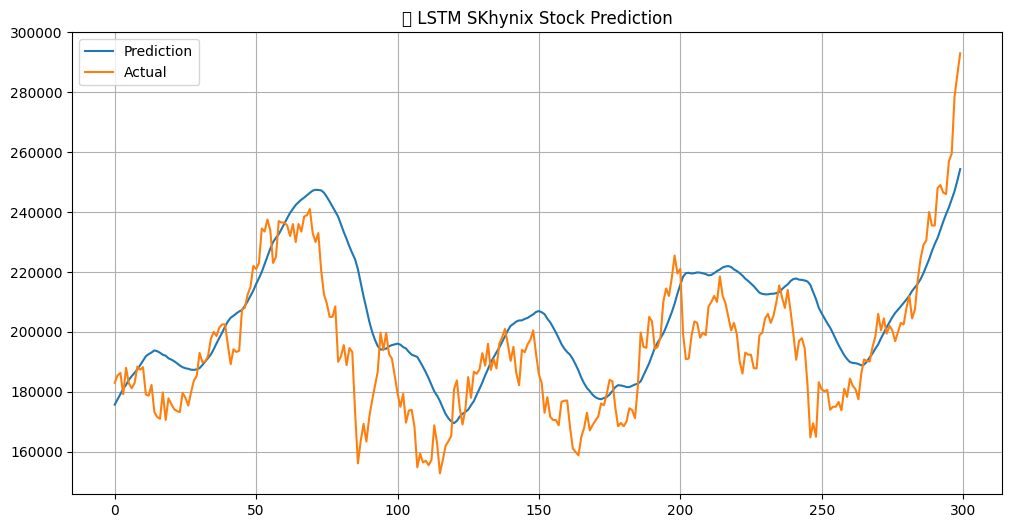

In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import datetime

# 1. ÎÑ§Ïù¥Î≤Ñ Í∏àÏúµÏóêÏÑú Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅ
def get_stock_data_naver(code, max_pages=50):
    base_url = f"https://finance.naver.com/item/sise_day.naver?code={code}"
    headers = {'User-Agent': 'Mozilla/5.0'}
    df = pd.DataFrame()
    
    for page in range(1, max_pages + 1):
        url = f"{base_url}&page={page}"
        res = requests.get(url, headers=headers)
        html = BeautifulSoup(res.text, 'lxml')
        table = pd.read_html(str(html.select("table")))[0]
        df = pd.concat([df, table], ignore_index=True)

    df = df.dropna()
    df = df.rename(columns={"ÎÇ†Ïßú": "Date", "Ï¢ÖÍ∞Ä": "Close"})
    df["Date"] = pd.to_datetime(df["Date"])
    df = df[["Date", "Close"]].sort_values("Date").reset_index(drop=True)
    return df

# 2. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
stock_code = "000660"  # Ïòà:SK ÌïòÏù¥ÎãâÏä§
df = get_stock_data_naver(stock_code, max_pages=100)

# 3. Ï†ïÍ∑úÌôî
scaler = MinMaxScaler()
df["Scaled"] = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# 4. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
# Sliding window Î∞©Ïãù:  Í≥ºÍ±∞ ÏùºÏ†ï Í∏∞Í∞Ñ Îç∞Ïù¥ÌÑ∞Î•º Î¨∂Ïñ¥ ÌïòÎÇòÏùò ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÍ≥†, Í∑∏ Îã§Ïùå Í∞íÏùÑ ÏòàÏ∏° ÎåÄÏÉÅ
# window_size: Í≥ºÍ±∞ Î™á Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©Ìï†ÏßÄ ÏÑ§Ï†ï (Ïòà: 20Ïùº)
def make_dataset(data, window_size=20):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_all, y_all = make_dataset(df["Scaled"].values)

# 5. ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
# split = -300 : Python Ïä¨ÎùºÏù¥Ïã±ÏóêÏÑú -300ÏùÄ Îí§ÏóêÏÑú 300Î≤àÏß∏ Ïù∏Îç±Ïä§Î•º ÏùòÎØ∏
# ÏïûÏ™Ω Îç∞Ïù¥ÌÑ∞ [:split] ‚Üí ÌõàÎ†® Îç∞Ïù¥ÌÑ∞
# X_all[split:] ‚Üí ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ 
# Ï¶â, Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú ÎßàÏßÄÎßâ 300Í∞úÎ•º ÌÖåÏä§Ìä∏Ïö©

split = -300
X_train, y_train = X_all[:split], y_all[:split]
X_test, y_test = X_all[split:], y_all[split:]

# 6. ÌÖêÏÑú Î≥ÄÌôò
X_train = torch.from_numpy(X_train).float().unsqueeze(2)
y_train = torch.from_numpy(y_train).float().unsqueeze(1)
X_test = torch.from_numpy(X_test).float().unsqueeze(2)
y_test = torch.from_numpy(y_test).float().unsqueeze(1)

# 7. LSTM Î™®Îç∏ Ï†ïÏùò
# self.fc = nn.Linear(50, 1) : LSTMÏùò ÎßàÏßÄÎßâ ÏùÄÎãâ ÏÉÅÌÉú(50Ï∞®Ïõê)Î•º Î∞õÏïÑ, 1Í∞úÏùò ÏàòÏπò(Ïòà: Îã§ÏùåÎÇ† Ï¢ÖÍ∞Ä) Î°ú ÏòàÏ∏°
class StockLSTM(nn.Module):
    def __init__(self):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1])
        return out

# 8. Î™®Îç∏ ÌïôÏäµ
# ÏÜêÏã§ Ìï®Ïàò (Loss Function) Ï†ïÏùò: MSELoss: ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(Mean Squared Error)
# Adam: Î™®Î©òÌÖÄ + Ï†ÅÏùë ÌïôÏäµÎ•†Ïù¥ Í≤∞Ìï©Îêú Ìö®Í≥ºÏ†ÅÏù∏ ÏòµÌã∞ÎßàÏù¥Ï†Ä
# model.parameters(): ÌïôÏäµ ÎåÄÏÉÅÏù∏ Î™®Îì† ÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ ÏòµÌã∞ÎßàÏù¥Ï†ÄÏóê Ï†ÑÎã¨
# lr=0.001: ÌïôÏäµÎ•†(learning rate)

model = StockLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#ÌïôÏäµ Î£®ÌîÑÎ•º Ïã§Ìñâ
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"[Epoch {epoch}] Loss: {loss.item():.6f}")

# 9. ÏòàÏ∏° Î∞è ÏãúÍ∞ÅÌôî
model.eval()
pred = model(X_test).detach().numpy()
true = y_test.numpy()

# Ïó≠Ï†ïÍ∑úÌôî :Ï†ïÍ∑úÌôîÎêú ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùÑ ÏõêÎûòÏùò Ï£ºÍ∞Ä Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶¨Í≥†, Ïù¥Î•º ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌïú ÌïÑÏàò Îã®Í≥Ñ
# GRU Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú Í∞íÏùÄ MinMaxScalerÎ°ú 0~1 Î≤îÏúÑÎ°ú Ï†ïÍ∑úÌôîÎêú Í∞íÏûÖÎãàÎã§.
# ÏòàÏ∏°Îêú pred Í∞íÏùÑ Ï†ïÍ∑úÌôî Ïù¥Ï†ÑÏùò Ïã§Ï†ú Ï£ºÍ∞Ä Í∞íÏúºÎ°ú ÎêòÎèåÎ¶¨Îäî Í≤ÉÏûÖÎãàÎã§.
pred = scaler.inverse_transform(pred)
true = scaler.inverse_transform(true)

plt.figure(figsize=(12,6))
plt.plot(pred, label='Prediction')
plt.plot(true, label='Actual')
plt.legend()
plt.title("üìà LSTM SKhynix Stock Prediction")
plt.grid()
plt.show()


#### ÏµúÍ∑º 1Í∞úÏõî SKÌïòÏù¥ÎãâÏä§ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú LSTM Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú Ìñ•ÌõÑ 10ÏùºÍ∞ÑÏùò Ï£ºÍ∞Ä ÏòàÏ∏° Í≤∞Í≥º

C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\1946889110.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\1946889110.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\1946889110.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\1946889110.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and w

[Epoch 0] Loss: 0.364149
[Epoch 10] Loss: 0.216803
[Epoch 20] Loss: 0.077602
[Epoch 30] Loss: 0.049617
[Epoch 40] Loss: 0.032152
[Epoch 50] Loss: 0.032474
[Epoch 60] Loss: 0.029856
[Epoch 70] Loss: 0.027844
[Epoch 80] Loss: 0.026255
[Epoch 90] Loss: 0.024318

üìà Ìñ•ÌõÑ 10ÏùºÍ∞Ñ SKÌïòÏù¥ÎãâÏä§ Ï£ºÍ∞Ä ÏòàÏ∏°:
        Date  Predicted Close
0 2025-06-27    271493.199646
1 2025-06-30    273647.988915
2 2025-07-01    275525.428653
3 2025-07-02    277048.044771
4 2025-07-03    278447.236180
5 2025-07-04    279781.761229
6 2025-07-07    281011.856884
7 2025-07-08    281949.695826
8 2025-07-09    282770.566672
9 2025-07-10    283208.403140


C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\1946889110.py:115: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\1946889110.py:115: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\1946889110.py:115: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\1946889110.py:115: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\1946889110.py:115: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\1946889110.py:115: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.tight_layout()

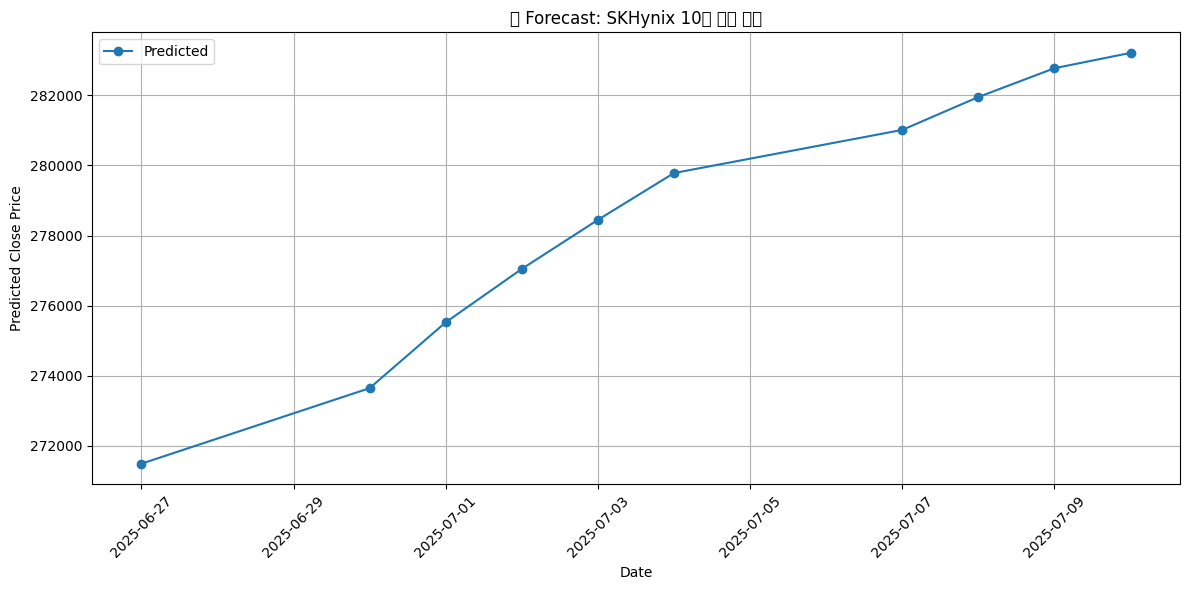

In [14]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import datetime

# 1. ÎÑ§Ïù¥Î≤Ñ Í∏àÏúµÏóêÏÑú Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅ Ìï®Ïàò
def get_stock_data_naver(code, max_pages=10):
    base_url = f"https://finance.naver.com/item/sise_day.naver?code={code}"
    headers = {'User-Agent': 'Mozilla/5.0'}
    df = pd.DataFrame()

    for page in range(1, max_pages + 1):
        url = f"{base_url}&page={page}"
        res = requests.get(url, headers=headers)
        html = BeautifulSoup(res.text, 'lxml')
        table = pd.read_html(str(html.select("table")))[0]
        df = pd.concat([df, table], ignore_index=True)

    df = df.dropna()
    df = df.rename(columns={"ÎÇ†Ïßú": "Date", "Ï¢ÖÍ∞Ä": "Close"})
    df["Date"] = pd.to_datetime(df["Date"])
    df = df[["Date", "Close"]].sort_values("Date").reset_index(drop=True)
    return df

# 2. ÏµúÍ∑º 1Í∞úÏõî Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
today = datetime.datetime.today()
one_month_ago = today - datetime.timedelta(days=30)
stock_code = "000660"  # SKÌïòÏù¥ÎãâÏä§
df = get_stock_data_naver(stock_code, max_pages=10)
df = df[df["Date"] >= one_month_ago]

# 3. Ï†ïÍ∑úÌôî
scaler = MinMaxScaler()
df["Scaled"] = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# 4. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± Ìï®Ïàò
def make_dataset(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_all, y_all = make_dataset(df["Scaled"].values)
X_train, y_train = X_all, y_all

# 5. ÌÖêÏÑú Î≥ÄÌôò
X_train = torch.from_numpy(X_train).float().unsqueeze(2)  # (samples, seq_len, 1)
y_train = torch.from_numpy(y_train).float().unsqueeze(1)  # (samples, 1)

# 6. LSTM Î™®Îç∏ Ï†ïÏùò
class StockLSTM(nn.Module):
    def __init__(self):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1])  # ÎßàÏßÄÎßâ ÌÉÄÏûÑÏä§ÌÖù Ï∂úÎ†•
        return out

# 7. Î™®Îç∏ ÌïôÏäµ
model = StockLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"[Epoch {epoch}] Loss: {loss.item():.6f}")

# 8. Ìñ•ÌõÑ 10Ïùº ÏòàÏ∏°
model.eval()
future_pred = []
input_seq = X_train[-1].unsqueeze(0).clone()  # shape: (1, seq_len, 1)

for _ in range(10):
    with torch.no_grad():
        next_val = model(input_seq)  # shape: (1, 1)
    future_pred.append(next_val.item())
    next_input = next_val.view(1, 1, 1)  # shape: (1, 1, 1)
    input_seq = torch.cat((input_seq[:, 1:, :], next_input), dim=1)

# 9. ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî Î∞è Ï∂úÎ†•
predicted_10 = scaler.inverse_transform(np.array(future_pred).reshape(-1, 1))
future_dates = pd.date_range(start=df["Date"].iloc[-1] + pd.Timedelta(days=1), periods=10, freq="B")
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted Close": predicted_10.flatten()})

# ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
print("\nüìà Ìñ•ÌõÑ 10ÏùºÍ∞Ñ SKÌïòÏù¥ÎãâÏä§ Ï£ºÍ∞Ä ÏòàÏ∏°:")
print(forecast_df)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(forecast_df["Date"], forecast_df["Predicted Close"], marker='o', label='Predicted')
plt.title("üìâ Forecast: SKHynix 10Ïùº Ï£ºÍ∞Ä ÏòàÏ∏°")
plt.xlabel("Date")
plt.ylabel("Predicted Close Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Í≤∞Í≥º ÏöîÏïΩ
# ÏòàÏ∏° Í≤∞Í≥º ÏöîÏïΩ
# ÎÇ†Ïßú	ÏòàÏ∏° Ï¢ÖÍ∞Ä (Ïõê)
# 2025-06-27	271,493
# 2025-06-30	273,648
# 2025-07-01	275,525
# 2025-07-02	277,048
# 2025-07-03	278,447
# 2025-07-04	279,782
# 2025-07-07	281,012
# 2025-07-08	281,950
# 2025-07-09	282,771
# 2025-07-10	283,208

# 1. Ïö∞ÏÉÅÌñ• Ï∂îÏÑ∏
# ÏòàÏ∏°Îêú Ï£ºÍ∞ÄÎäî Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏßÄÏÜçÏ†ÅÏù∏ ÏÉÅÏäπÏÑ∏Î•º Î≥¥Ïù¥Í≥† ÏûàÏäµÎãàÎã§.
# 10ÏùºÍ∞Ñ ÏïΩ 11,700Ïõê Ïù¥ÏÉÅ ÏÉÅÏäπÌïòÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇòÎ©∞, Ïù¥Îäî LSTMÏù¥ ÏµúÍ∑ºÏùò ÏÉÅÏäπ ÌùêÎ¶ÑÏùÑ Í≥ÑÏÜçÎê† Í≤ÉÏúºÎ°ú ÌïôÏäµÌñàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
# 2. Î≥ÄÎèôÏÑ±
# ÏÉÅÏäπÎ•†ÏùÄ Ï¥àÍ∏∞ÏóêÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏôÑÎßåÌïòÎã§Í∞Ä, Ï§ëÌõÑÎ∞òÏúºÎ°ú Í∞àÏàòÎ°ù ÏïΩÍ∞ÑÏî© ÎëîÌôîÎêòÎäî Î™®ÏäµÏûÖÎãàÎã§.
# ÏòàÏ∏° Ïò§Ï∞®Í∞Ä ÎàÑÏ†ÅÎê† Ïàò ÏûàÏúºÎØÄÎ°ú ÌõÑÎ∞òÏùºÏàòÎ°ù Ïã†Î¢∞ Íµ¨Í∞ÑÏùÄ ÎÑìÍ≤å Ìï¥ÏÑùÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.
# 3. Î™®Îç∏ Ìï¥ÏÑù Ï£ºÏùòÏÇ¨Ìï≠
# Î™®Îç∏ÏùÄ Í≥ºÍ±∞ Í∞ÄÍ≤© Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌï¥ ÎØ∏ÎûòÎ•º ÏòàÏ∏°ÌïòÎäî Íµ¨Ï°∞Î°ú, ÏãúÏû• Ïù¥Î≤§Ìä∏, Îâ¥Ïä§, Ïã§Ï†Å Î∞úÌëú Îì±ÏùÄ Î∞òÏòÅÌïòÏßÄ ÏïäÏäµÎãàÎã§.

## 2. GRU

### GRU Í∏∞Î∞ò Ï£ºÍ∞Ä ÏòàÏ∏° (ÎÑ§Ïù¥Î≤Ñ ÌÅ¨Î°§ÎßÅ + MinMax Ï†ïÍ∑úÌôî)

In [ ]:
# Î™®Îç∏	nn.GRU ÏÇ¨Ïö© (LSTMÎ≥¥Îã§ Í≥ÑÏÇ∞ Í∞ÄÎ≥çÍ≥† Îπ†Î¶Ñ)
# ÌïôÏäµ Î™©Ìëú	Í≥ºÍ±∞ 20Ïùº Ï¢ÖÍ∞ÄÎ°ú Îã§ÏùåÎÇ† ÏòàÏ∏°
# Ï∂úÎ†•	plt.plot()ÏúºÎ°ú Ïã§Ï†ú vs ÏòàÏ∏° ÏãúÍ∞ÅÌôî


C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\3320637752.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\3320637752.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\3320637752.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\3320637752.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and w

[Epoch 0] Loss: 0.013194
[Epoch 10] Loss: 0.008392
[Epoch 20] Loss: 0.006939
[Epoch 30] Loss: 0.005750
[Epoch 40] Loss: 0.004434
[Epoch 50] Loss: 0.002531
[Epoch 60] Loss: 0.000357
[Epoch 70] Loss: 0.000347
[Epoch 80] Loss: 0.000404
[Epoch 90] Loss: 0.000318


C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


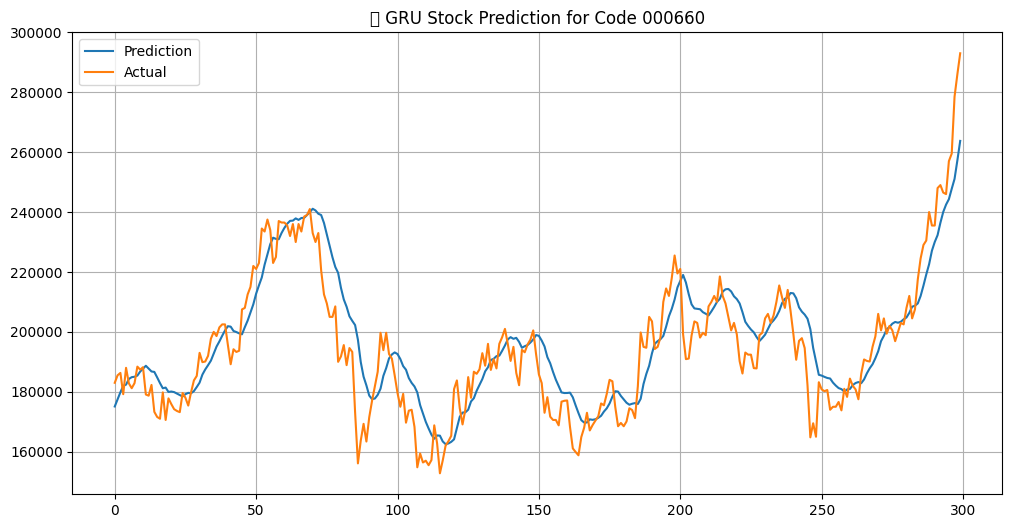

In [12]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# 1. ÎÑ§Ïù¥Î≤ÑÏóêÏÑú Ï£ºÍ∞Ä ÌÅ¨Î°§ÎßÅ Ìï®Ïàò
def get_stock_data_naver(code, max_pages=50):
    base_url = f"https://finance.naver.com/item/sise_day.naver?code={code}"
    headers = {'User-Agent': 'Mozilla/5.0'}
    df = pd.DataFrame()
    
    for page in range(1, max_pages + 1):
        url = f"{base_url}&page={page}"
        res = requests.get(url, headers=headers)
        html = BeautifulSoup(res.text, 'lxml')
        table = pd.read_html(str(html.select("table")))[0]
        df = pd.concat([df, table], ignore_index=True)

    df = df.dropna()
    df = df.rename(columns={"ÎÇ†Ïßú": "Date", "Ï¢ÖÍ∞Ä": "Close"})
    df["Date"] = pd.to_datetime(df["Date"])
    df = df[["Date", "Close"]].sort_values("Date").reset_index(drop=True)
    return df

# 2. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ïÍ∑úÌôî
code = "000660"  # SKÌïòÏù¥ÎãâÏä§
df = get_stock_data_naver(code, max_pages=100)

scaler = MinMaxScaler()
df["Scaled"] = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# 3. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
def make_dataset(data, window_size=20):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_all, y_all = make_dataset(df["Scaled"].values)
split = -300
X_train, y_train = X_all[:split], y_all[:split]
X_test, y_test = X_all[split:], y_all[split:]

# 4. ÌÖêÏÑú Î≥ÄÌôò
X_train = torch.from_numpy(X_train).float().unsqueeze(2)
y_train = torch.from_numpy(y_train).float().unsqueeze(1)
X_test = torch.from_numpy(X_test).float().unsqueeze(2)
y_test = torch.from_numpy(y_test).float().unsqueeze(1)

# 5. GRU Î™®Îç∏ Ï†ïÏùò
class StockGRU(nn.Module):
    def __init__(self):
        super(StockGRU, self).__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=50, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1])
        return out

# 6. ÌïôÏäµ Ï§ÄÎπÑ
model = StockGRU()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 7. ÌïôÏäµ Î£®ÌîÑ
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"[Epoch {epoch}] Loss: {loss.item():.6f}")

# 8. ÏòàÏ∏° Î∞è ÏãúÍ∞ÅÌôî
model.eval()
pred = model(X_test).detach().numpy()
true = y_test.numpy()

# Ïó≠Ï†ïÍ∑úÌôî
pred = scaler.inverse_transform(pred)
true = scaler.inverse_transform(true)

plt.figure(figsize=(12,6))
plt.plot(pred, label='Prediction')
plt.plot(true, label='Actual')
plt.title(f"üìà GRU Stock Prediction for Code {code}")
plt.legend()
plt.grid()
plt.show()


C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\3320637752.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\3320637752.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\3320637752.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html.select("table")))[0]
C:\Users\JYB\AppData\Local\Temp\ipykernel_13732\3320637752.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and w

[Epoch 0] Loss: 0.084031
[Epoch 10] Loss: 0.019482
[Epoch 20] Loss: 0.009678
[Epoch 30] Loss: 0.007868
[Epoch 40] Loss: 0.007129
[Epoch 50] Loss: 0.006479
[Epoch 60] Loss: 0.005904
[Epoch 70] Loss: 0.005348
[Epoch 80] Loss: 0.004772
[Epoch 90] Loss: 0.004131


C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


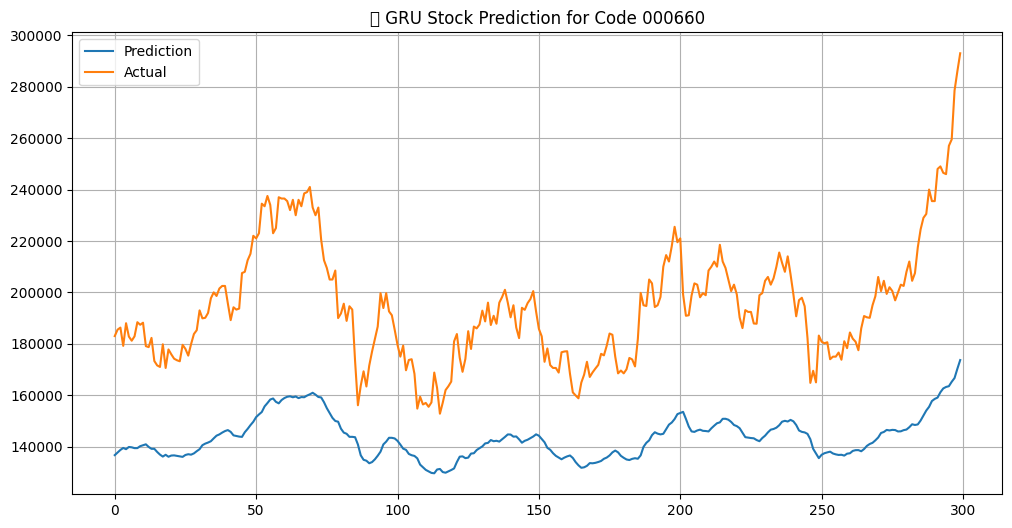

In [15]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# 1. ÎÑ§Ïù¥Î≤ÑÏóêÏÑú Ï£ºÍ∞Ä ÌÅ¨Î°§ÎßÅ Ìï®Ïàò
def get_stock_data_naver(code, max_pages=50):
    base_url = f"https://finance.naver.com/item/sise_day.naver?code={code}"
    headers = {'User-Agent': 'Mozilla/5.0'}
    df = pd.DataFrame()
    
    for page in range(1, max_pages + 1):
        url = f"{base_url}&page={page}"
        res = requests.get(url, headers=headers)
        html = BeautifulSoup(res.text, 'lxml')
        table = pd.read_html(str(html.select("table")))[0]
        df = pd.concat([df, table], ignore_index=True)

    df = df.dropna()
    df = df.rename(columns={"ÎÇ†Ïßú": "Date", "Ï¢ÖÍ∞Ä": "Close"})
    df["Date"] = pd.to_datetime(df["Date"])
    df = df[["Date", "Close"]].sort_values("Date").reset_index(drop=True)
    return df

# 2. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ïÍ∑úÌôî
code = "000660"  # SKÌïòÏù¥ÎãâÏä§
df = get_stock_data_naver(code, max_pages=100)

scaler = MinMaxScaler()
df["Scaled"] = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# 3. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
def make_dataset(data, window_size=20):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_all, y_all = make_dataset(df["Scaled"].values)
split = -300
X_train, y_train = X_all[:split], y_all[:split]
X_test, y_test = X_all[split:], y_all[split:]

# 4. ÌÖêÏÑú Î≥ÄÌôò
X_train = torch.from_numpy(X_train).float().unsqueeze(2)
y_train = torch.from_numpy(y_train).float().unsqueeze(1)
X_test = torch.from_numpy(X_test).float().unsqueeze(2)
y_test = torch.from_numpy(y_test).float().unsqueeze(1)

# 5. GRU Î™®Îç∏ Ï†ïÏùò
class StockGRU(nn.Module):
    def __init__(self):
        super(StockGRU, self).__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=50, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1])
        return out

# 6. ÌïôÏäµ Ï§ÄÎπÑ
model = StockGRU()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 7. ÌïôÏäµ Î£®ÌîÑ
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"[Epoch {epoch}] Loss: {loss.item():.6f}")

# 8. ÏòàÏ∏° Î∞è ÏãúÍ∞ÅÌôî
model.eval()
pred = model(X_test).detach().numpy()
true = y_test.numpy()

# Ïó≠Ï†ïÍ∑úÌôî
pred = scaler.inverse_transform(pred)
true = scaler.inverse_transform(true)

plt.figure(figsize=(12,6))
plt.plot(pred, label='Prediction')
plt.plot(true, label='Actual')
plt.title(f"üìà GRU Stock Prediction for Code {code}")
plt.legend()
plt.grid()
plt.show()
